<h1 style="color:rgb(0,120,170)">Assignment 4: PCA and Kernel PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

<h3 style="color:rgb(210,90,80)">Exercise 1 (20 points):</h3>



I had to look up the proof for the positive semi-definite Covariance matrix and used this --> https://statproofbook.github.io/P/covmat-psd.html

$\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$

Expand $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle$ r.h.s as sum over n, denote $Xa$ as $m$:

$\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle = \frac 1n \mathbf{X}^T\mathbf{X}a$

$= \frac 1n \sum_{i=1}^n  \mathbf{X}^Tm$

$= \left\langle\frac 1n \mathbf{X}^Tm, a\right\rangle$ write sum as the  matrix inner product

$= \frac 1n \left\langle m, \mathbf{X} a\right\rangle$

$= \frac 1n \left\langle m, m \right\rangle $

$= \frac 1n \lVert m \rVert^2 \geq 0$ which means for any $\mathbf{a} \in \mathbb{R}^m, \left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle \geq 0$

"Positive semi-definite" implies that the eigenvalues are non-negative that's why PCA works well to keep variance non-negative.

<h2 style="color:rgb(0,120,170)">PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [138]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

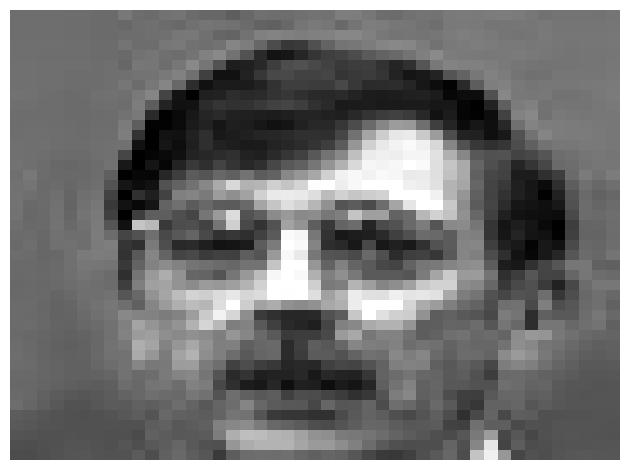

In [139]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
    
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(210,90,80)">Exercise 2 (10 points):</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

In [140]:
data.shape

(3059, 2250)

In [141]:
variance_vals = [0.5, 0.75, 0.99]
pca = PCA().fit(data)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

for var_val in variance_vals:
    num_comp = np.where(explained_variance >= var_val)[0][0] + 1
    print(f'Num. principal components for variance_val {var_val}: {num_comp}')

Num. principal components for variance_val 0.5: 4
Num. principal components for variance_val 0.75: 18
Num. principal components for variance_val 0.99: 367


<h3 style="color:rgb(0,120,170)">Exercise 3 (10 points):</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

In [142]:
num_comp_list = [4, 18, 367]

for num_comp in num_comp_list:
    pca = PCA(n_components=num_comp)
    data_pca = pca.fit_transform(data)
    data_pca_inv = pca.inverse_transform(data_pca)
    print(f'Original Data: {data.shape} | Shape after PCA: {data_pca.shape} | Shape after inverse PCA: {data_pca_inv.shape}')

Original Data: (3059, 2250) | Shape after PCA: (3059, 4) | Shape after inverse PCA: (3059, 2250)
Original Data: (3059, 2250) | Shape after PCA: (3059, 18) | Shape after inverse PCA: (3059, 2250)
Original Data: (3059, 2250) | Shape after PCA: (3059, 367) | Shape after inverse PCA: (3059, 2250)


In [164]:
def perform_pca(data, num_comp_list):
    results = []
    for num_comp in num_comp_list:
        pca = PCA(n_components=num_comp)
        data_pca = pca.fit_transform(data)
        data_pca_inv = pca.inverse_transform(data_pca)
        results.append((data_pca, data_pca_inv))
    return results

results = perform_pca(data, num_comp_list)

for i, result in enumerate(results):
    data_pca, data_pca_inv = result
    print(f'After PCA: {data_pca.shape} | Back-transform PCA: {data_pca_inv.shape}')

After PCA: (3059, 4) | Back-transform PCA: (3059, 2250)
After PCA: (3059, 18) | Back-transform PCA: (3059, 2250)
After PCA: (3059, 367) | Back-transform PCA: (3059, 2250)


<h3 style="color:rgb(210,90,80)">Exercise 4 (15 points):</h3>

Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

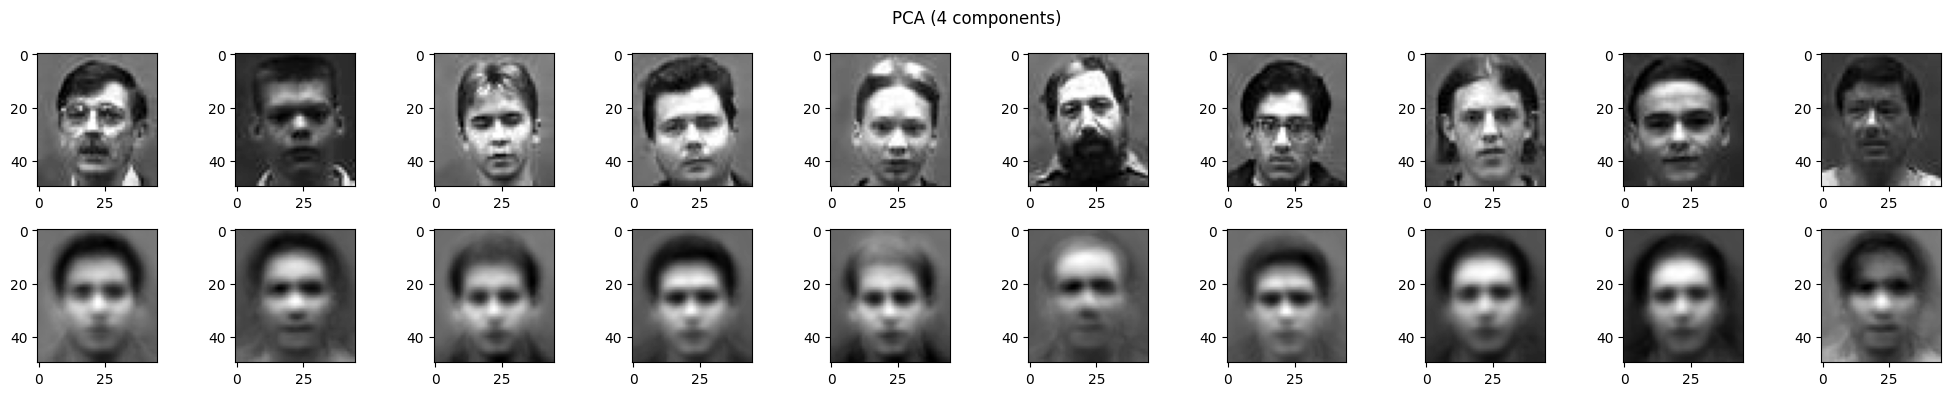

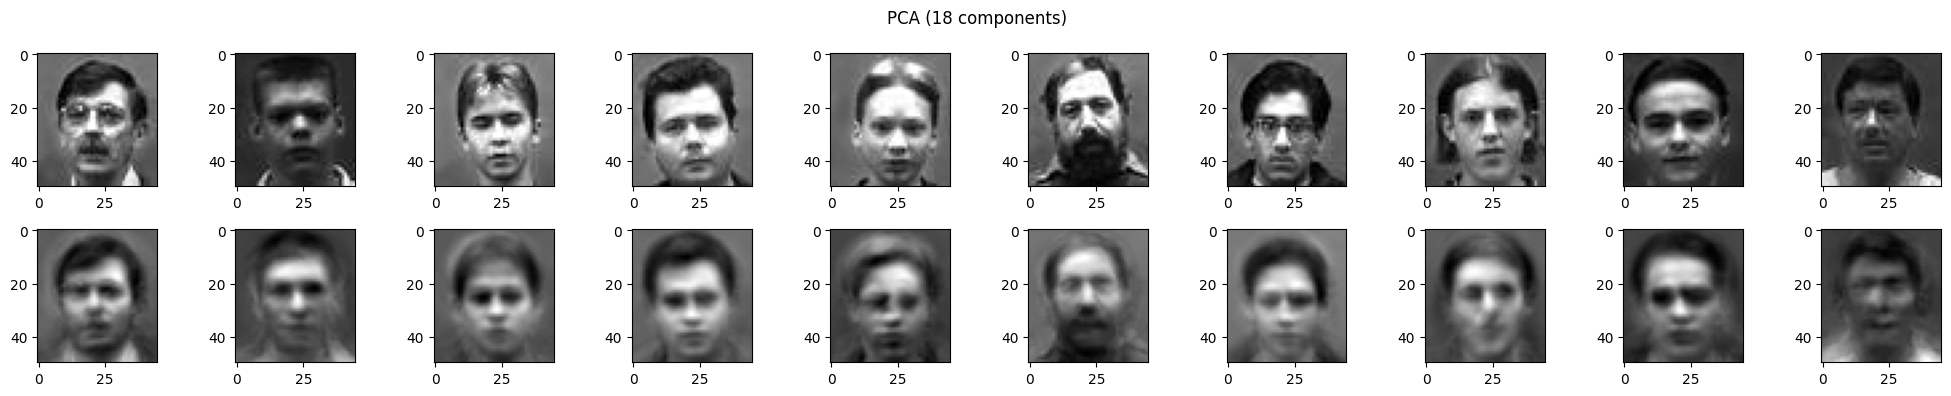

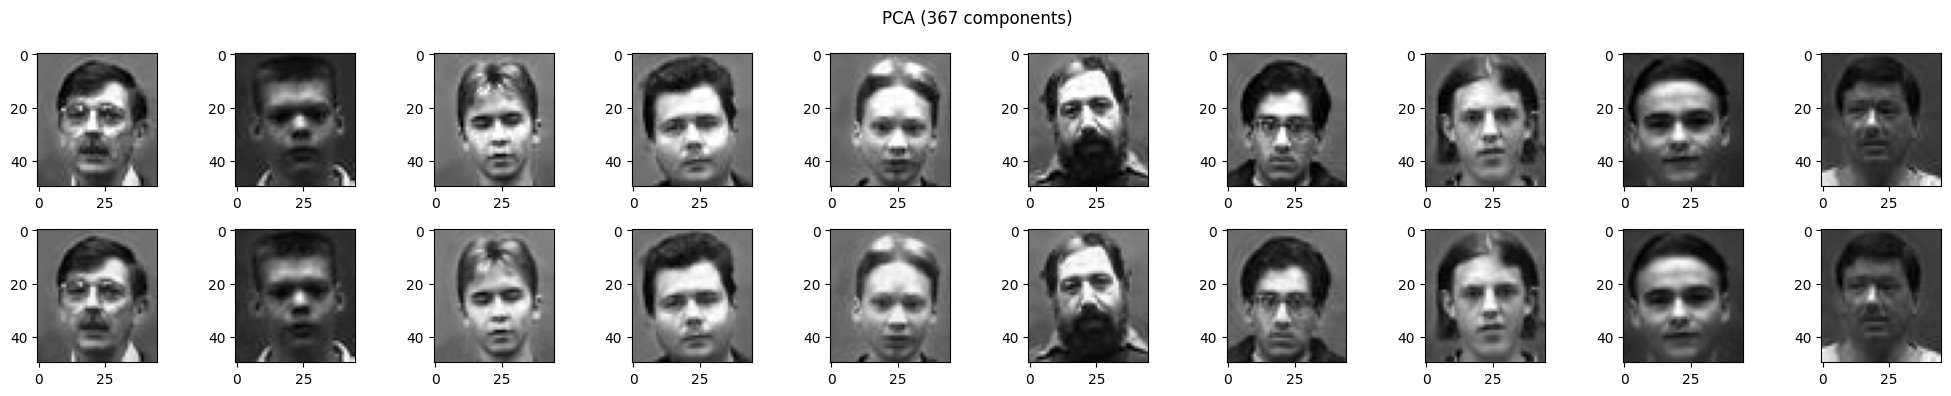

In [147]:
for num_comp in num_comp_list:
    
    pca = PCA(n_components=num_comp)
    data_pca = pca.fit_transform(data)
    data_pca_inv = pca.inverse_transform(data_pca)

    fig, axs = plt.subplots(2, 10, figsize=(20, 4))
    for i in range(10):
        axs[0, i].imshow(data[i, :].reshape(45, 50).T, cmap=cm.gray)
        axs[1, i].imshow(data_pca_inv[i, :].reshape(45, 50).T, cmap=cm.gray)

    plt.suptitle(f'PCA ({num_comp} components)', fontsize=12)
    plt.tight_layout()
    plt.show()

<h3 style="color:rgb(210,90,80)">Exercise 5 (5 points):</h3>

Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

Facial features are lost in low PCA values (4 components), images are not recognizable and blurry in comparison to the original images.

<h2 style="color:rgb(0,120,170)">PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [148]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Exercise 6 (10 Points):</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

In [163]:
data3_pca = PCA().fit(data3)
variance_ratio_1 = data3_pca.explained_variance_ratio_
for i, variance_val in enumerate(variance_ratio_1):
    print(f'(Data 3) Explained variance for component {i+1}: {variance_val}')

data4_pca = PCA().fit(data4)
variance_ratio_2 = data4_pca.explained_variance_ratio_
for i, variance_val in enumerate(variance_ratio_2):
    print(f'(Data 4) Explained variance for component {i+1}: {variance_val}')

(Data 3) Explained variance for component 1: 0.5932170026500673
(Data 3) Explained variance for component 2: 0.4067829973499326
(Data 4) Explained variance for component 1: 0.5123999190427535
(Data 4) Explained variance for component 2: 0.42758716091068555
(Data 4) Explained variance for component 3: 0.06001292004656091


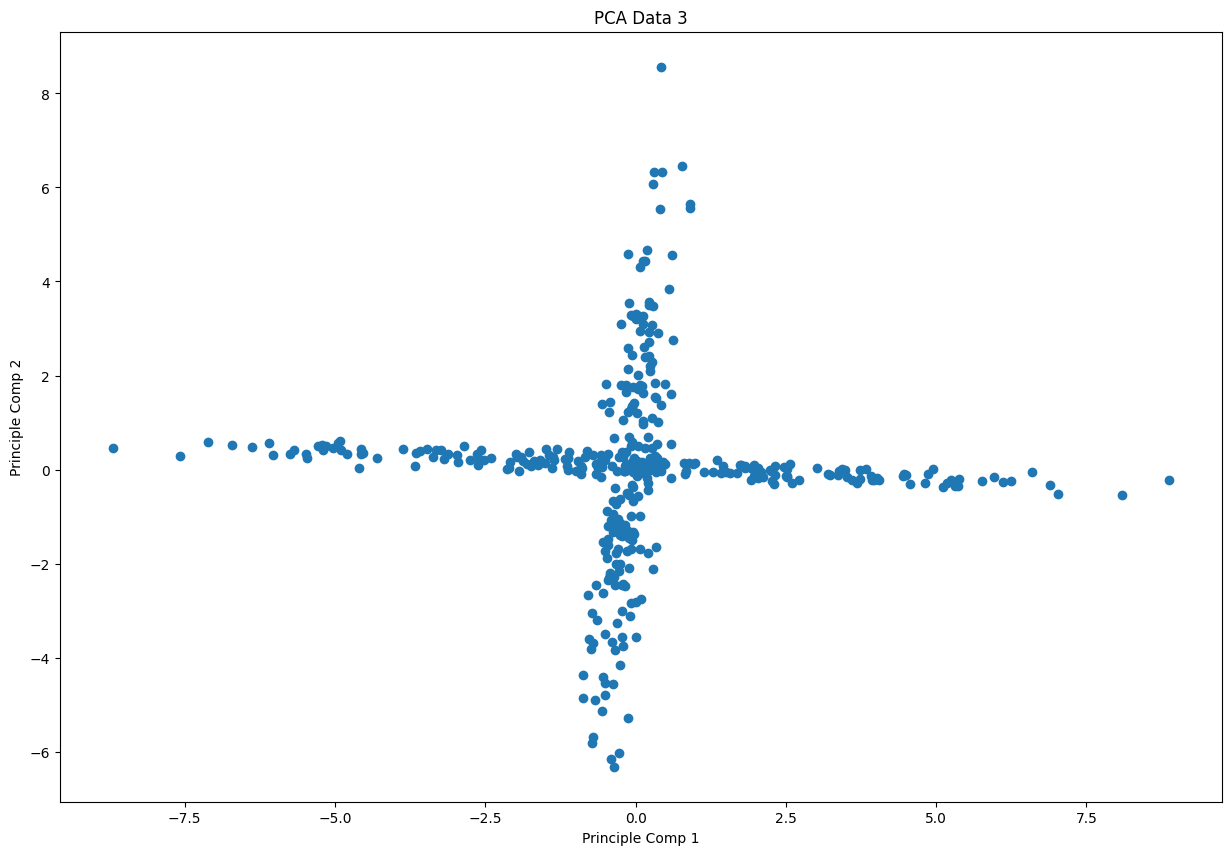

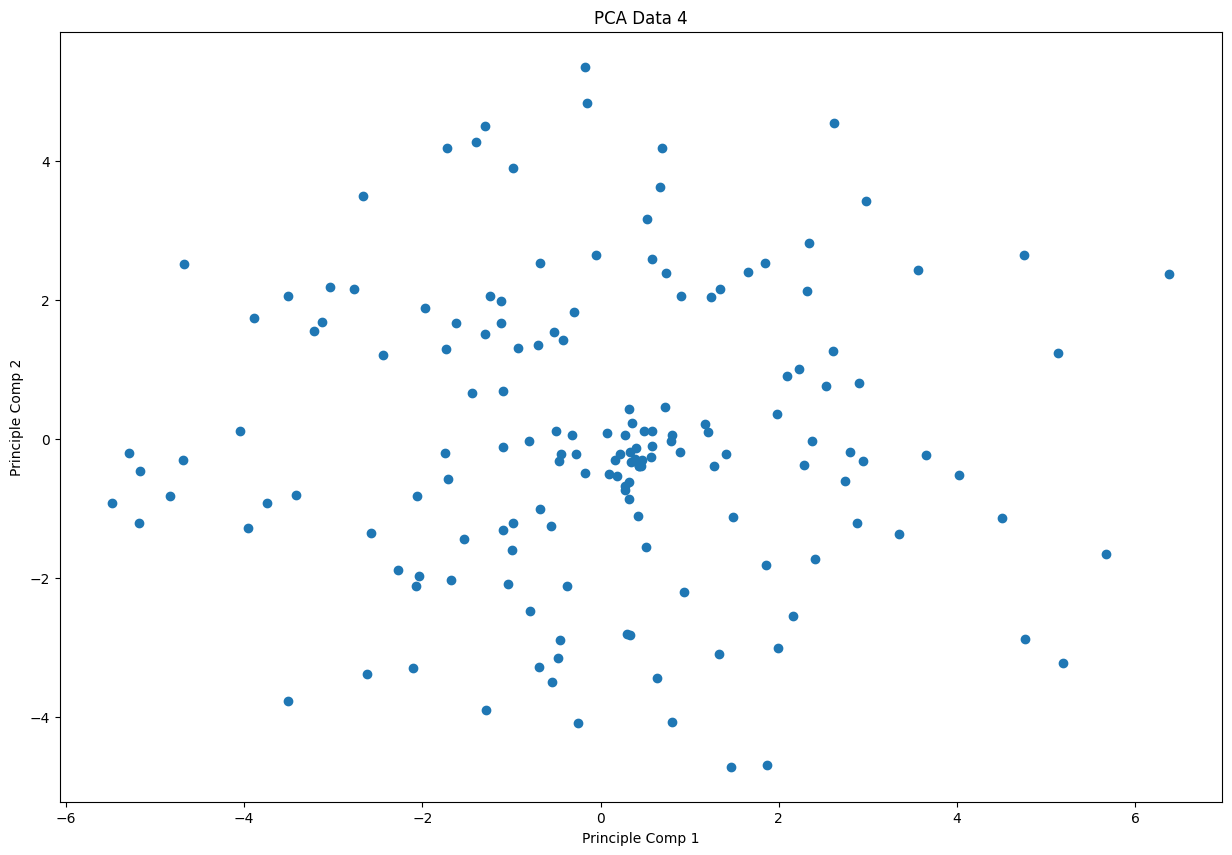

In [150]:
data3_pca = PCA(n_components=2)
data3_pca = data3_pca.fit_transform(data3)

plt.figure(figsize=(15, 10))
plt.scatter(data3_pca[:, 0], data3_pca[:, 1])

plt.xlabel('Principle Comp 1')
plt.ylabel('Principle Comp 2')
plt.title('PCA Data 3')
plt.show()

data4_pca = PCA(n_components=3)
data4_pca = data4_pca.fit_transform(data4)

plt.figure(figsize=(15, 10))
plt.scatter(data4_pca[:, 0], data4_pca[:, 1])
plt.xlabel('Principle Comp 1')
plt.ylabel('Principle Comp 2')
plt.title('PCA Data 4')
plt.show()

<h3 style="color:rgb(0,120,170)">Exercise 7 (20 points):</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

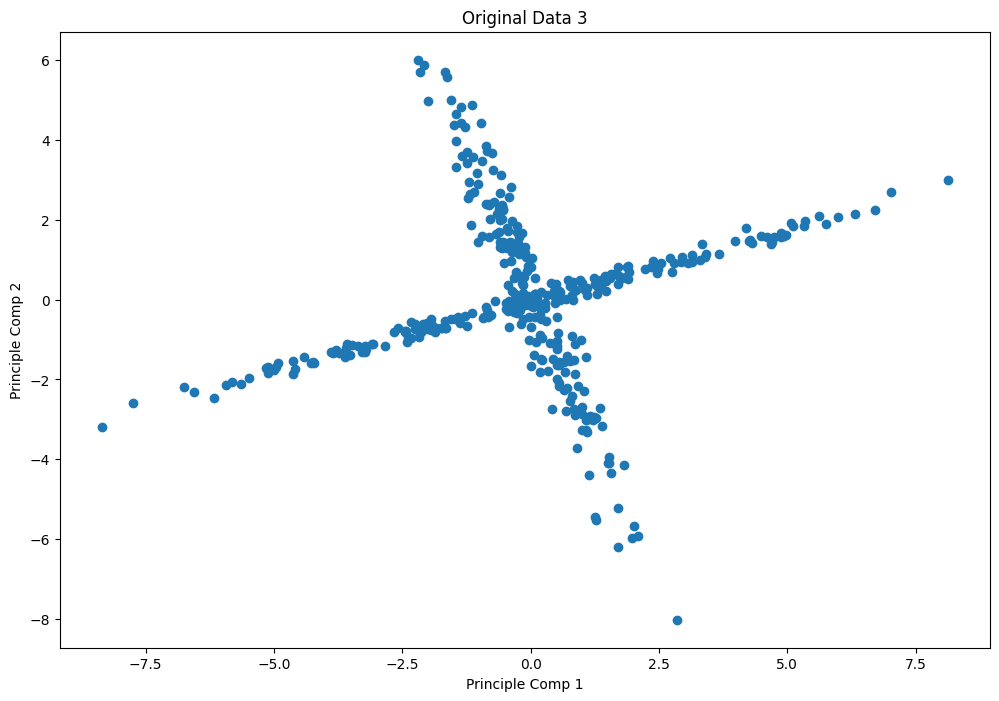

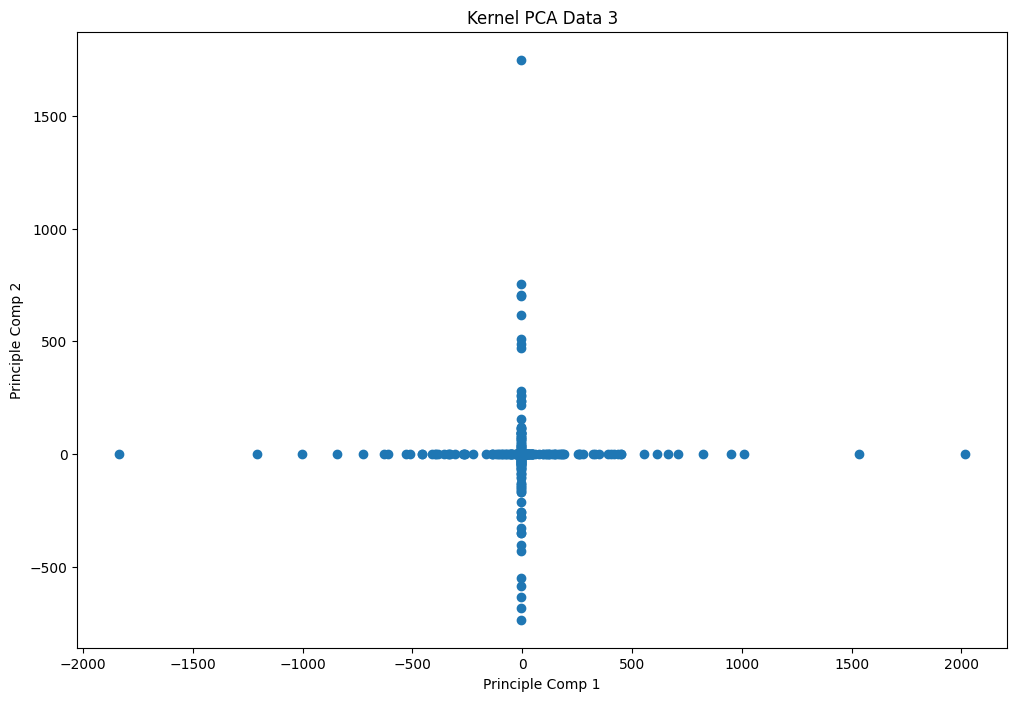

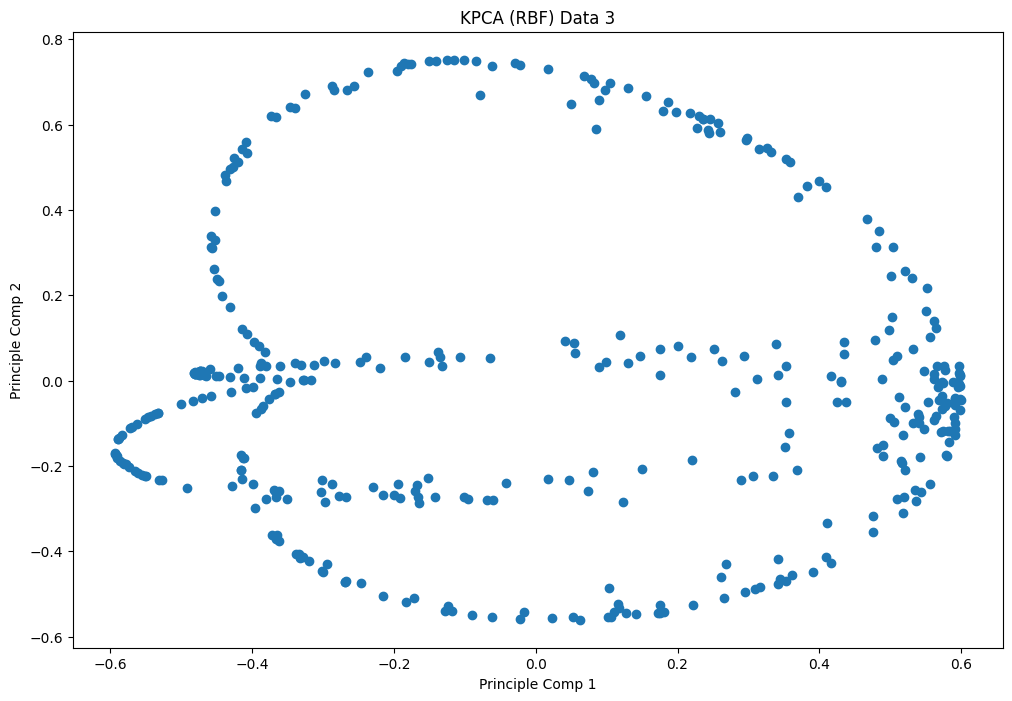

In [152]:
KPCA3 = KernelPCA(n_components=2, kernel='poly', gamma=2, degree=3)
KPCA3_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.25)

data3_kpca = KPCA3.fit_transform(data3)
data3_kpca_rbf = KPCA3_rbf.fit_transform(data3)

plt.figure(figsize=(12, 8))
plt.scatter(data3[:, 0], data3[:, 1])
plt.xlabel('Principle Comp 1')
plt.ylabel('Principle Comp 2')
plt.title('Original Data 3')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(data3_kpca[:, 0], data3_kpca[:, 1])
plt.xlabel('Principle Comp 1')
plt.ylabel('Principle Comp 2')
plt.title('Kernel PCA Data 3')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(data3_kpca_rbf[:, 0], data3_kpca_rbf[:, 1])
plt.xlabel('Principle Comp 1')
plt.ylabel('Principle Comp 2')
plt.title('KPCA (RBF) Data 3')
plt.show()

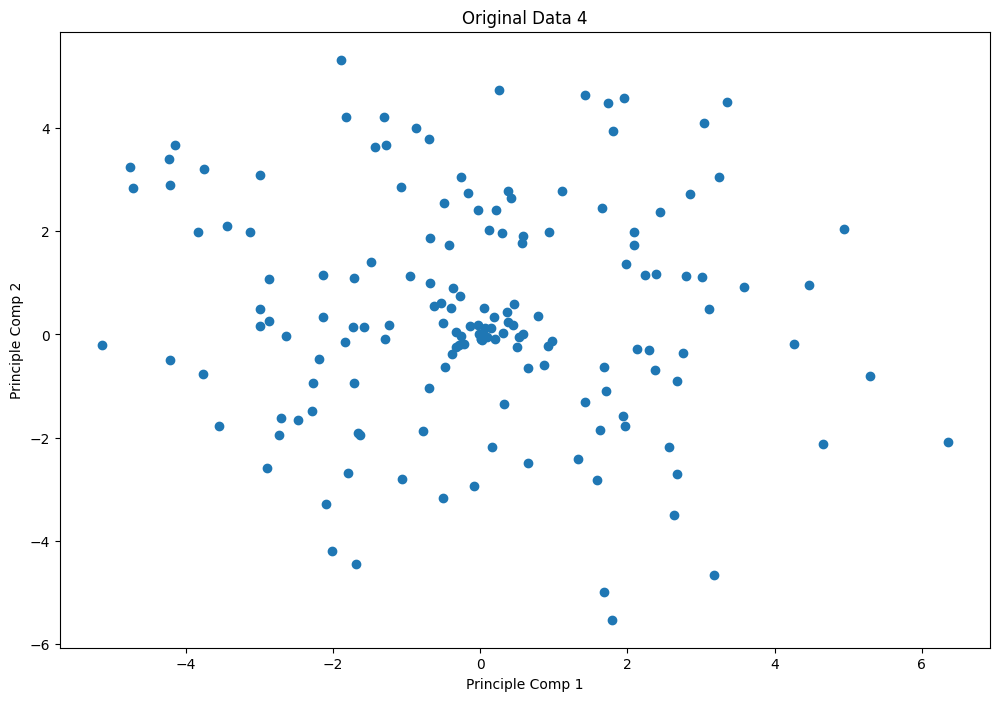

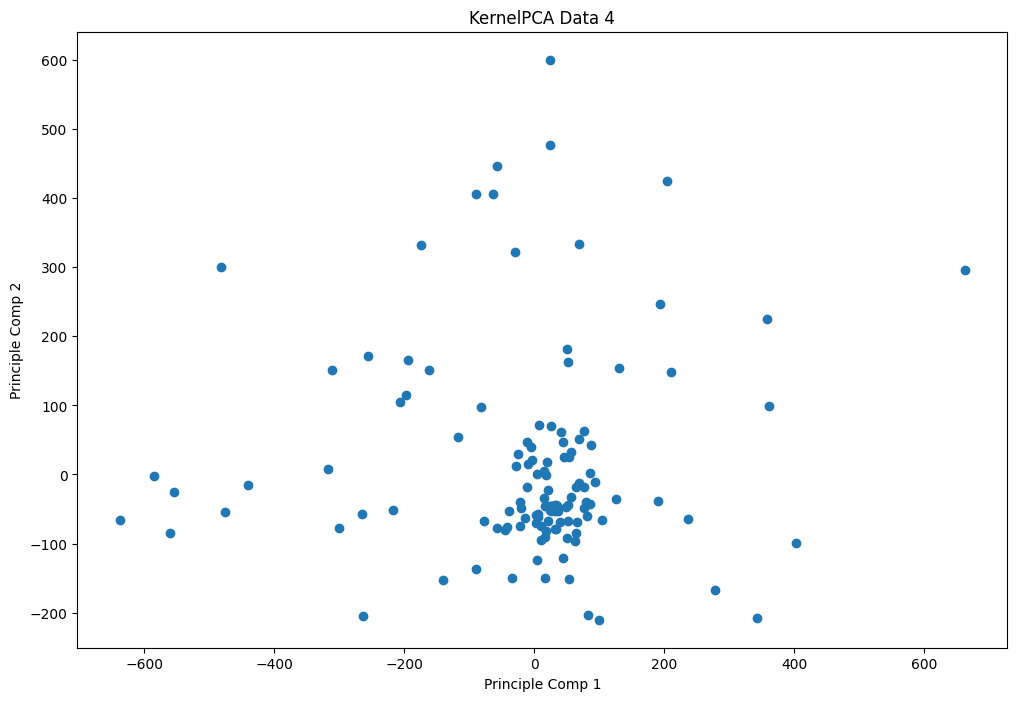

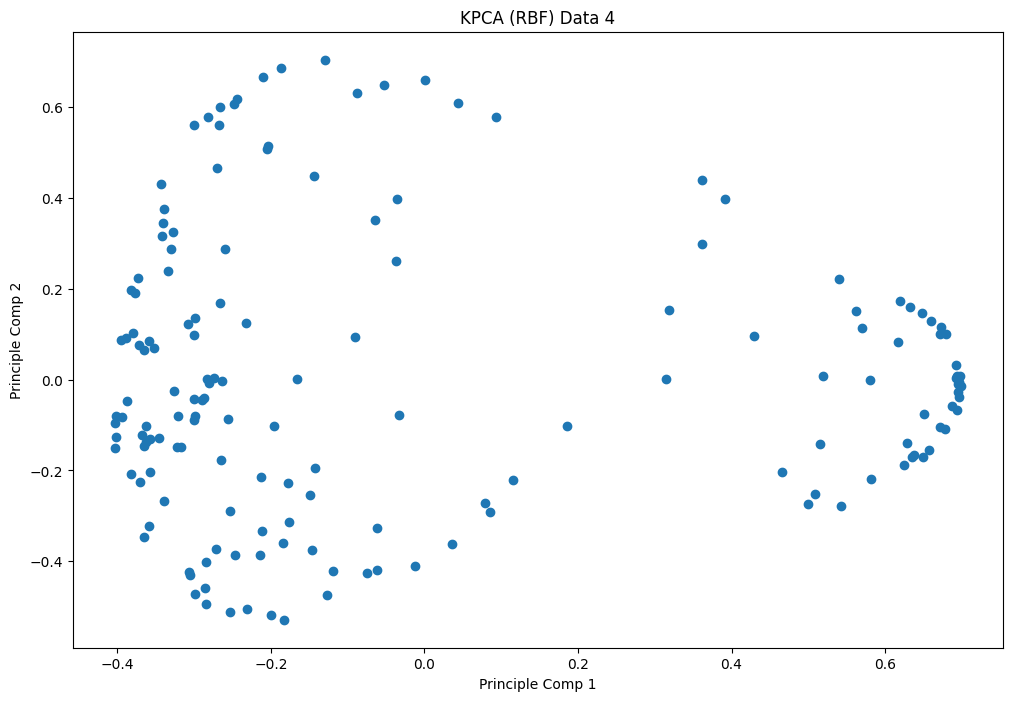

In [162]:
KPCA4 = KernelPCA(n_components=3, kernel='poly', gamma=2, degree=3)
KPCA4_rbf = KernelPCA(n_components=3, kernel='rbf', gamma=0.25)

data4_kpca = KPCA4.fit_transform(data4)
data4_kpca_rbf = KPCA4_rbf.fit_transform(data4)

plt.figure(figsize=(12, 8))
plt.scatter(data4[:, 0], data4[:, 1])
plt.xlabel('Principle Comp 1')
plt.ylabel('Principle Comp 2')
plt.title('Original Data 4')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(data4_kpca[:, 0], data4_kpca[:, 1])
plt.xlabel('Principle Comp 1')
plt.ylabel('Principle Comp 2')
plt.title('KernelPCA Data 4')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(data4_kpca_rbf[:, 0], data4_kpca_rbf[:, 1])
plt.xlabel('Principle Comp 1')
plt.ylabel('Principle Comp 2')
plt.title('KPCA (RBF) Data 4')
plt.show()

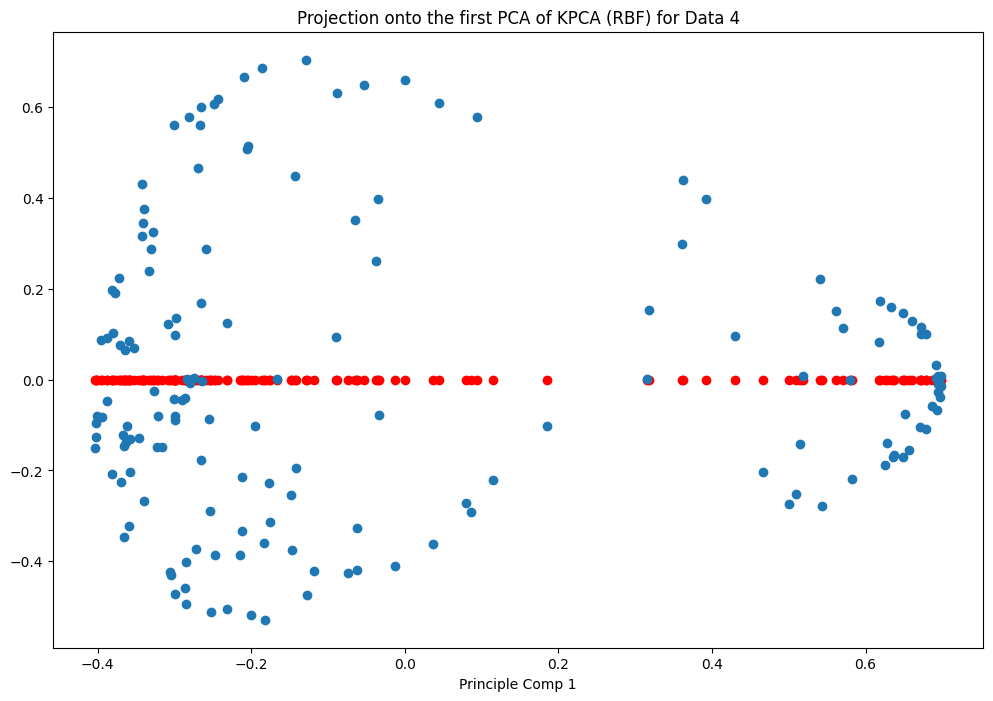

In [158]:
plt.figure(figsize=(12, 8))
plt.scatter(data4_kpca_rbf[:, 0], np.zeros_like(data4_kpca_rbf[:, 0]), c='r')
plt.scatter(data4_kpca_rbf[:, 0], data4_kpca_rbf[:, 1])
plt.xlabel('Principle Comp 1')
plt.title('Projection onto the first PCA of KPCA (RBF) for Data 4')
plt.show()

<h3 style="color:rgb(0,120,170)">Exercise 8 (10 points):</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


Kernel PCA can be useful for identifying non-linearities in the data by mapping the data to a higher dimensional space.
When linear separation is not possible using Kernel PCA can be useful.